- Computer Vision Object Dectection
- Computer Vision API를 사용해서 이미지속에 있는 사물을 인식하는 데모입니다.
- 네트워크 통신을 위해서 requests 패키지를 import 합니다.

In [3]:
import requests

- 이미지처리를 위해서 matplotlib.pyplot, Image, BytesIO 세 개의 패키지를 import 합니다.

- matplotlib.pyplot는 import 할 때 시간이 조금 걸릴 수 있습니다.

In [4]:
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

In [5]:
import json

- Subscription Key와 접속에 필요한 URL을 설정합니다.

In [6]:
subscription_key = ''
vision_base_url = ''

In [7]:
analyze_url = vision_base_url + 'analyze'

- 분석에 사용되는 이미지를 확인합니다.

In [8]:
image_url = 'http://image.ohmynews.com/down/images/1/news4u_311409_1[503685].gif'

In [9]:
con = requests.get(image_url).content
byte = BytesIO(con)
image = Image.open(byte)

# imge = Image.open(BytesIO(requests.get(imgae_url).content))

- 이미지 분류

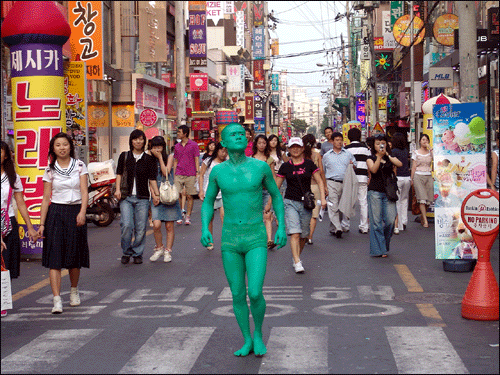

In [10]:
image

In [11]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [12]:
response = requests.post(analyze_url, headers = headers, params = params, json = data) #get or post

In [13]:
result = response.json()

In [14]:
result

{'categories': [{'name': 'outdoor_street',
   'score': 0.74609375,
   'detail': {'landmarks': []}}],
 'color': {'dominantColorForeground': 'Grey',
  'dominantColorBackground': 'Grey',
  'dominantColors': ['Grey'],
  'accentColor': '128772',
  'isBwImg': False,
  'isBWImg': False},
 'description': {'tags': ['road',
   'street',
   'person',
   'outdoor',
   'building',
   'walking',
   'scene',
   'city',
   'sidewalk',
   'people',
   'busy',
   'woman',
   'group',
   'standing',
   'traffic',
   'many',
   'holding',
   'sign',
   'young',
   'umbrella',
   'crowded',
   'bus',
   'crowd',
   'man',
   'riding'],
  'captions': [{'text': 'a group of people walking down a busy city street',
    'confidence': 0.9795858111803634}]},
 'requestId': 'c196881d-3b7f-4ceb-a974-9a55bae7bb01',
 'metadata': {'height': 375, 'width': 500, 'format': 'Gif'}}

In [15]:
image_caption = result['description']['captions'][0]['text']

In [16]:
image_caption

'a group of people walking down a busy city street'

- Object Detection (computer vision)

In [17]:
objectDetection_url = vision_base_url + 'detect'

In [18]:
image_url = 'https://image-notepet.akamaized.net/resize/620x-/seimage/20190723%2F0c3e8f7eddbb089980ca3ab6867f1a95.png'


In [19]:
image = Image.open(BytesIO(requests.get(image_url).content))

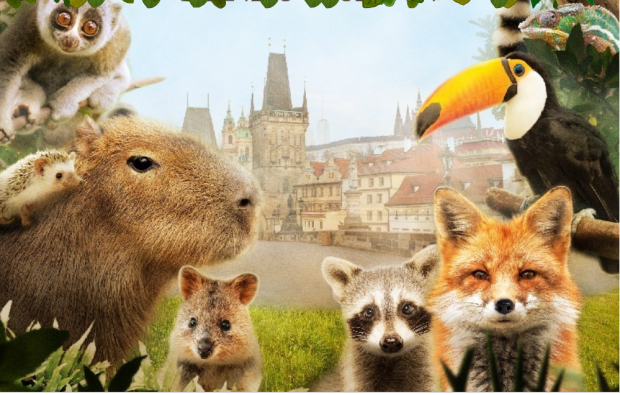

In [20]:
image

In [21]:
headers = {'Ocp-Apim-Subscription-key': subscription_key}
params  = {'visualFeatures': 'Categories,Description,Color'}
data = {'url': image_url}

In [22]:
response = requests.post(objectDetection_url, headers = headers, params = params, json = data) #get or post

In [23]:
result = response.json()

In [24]:
result

{'objects': [{'rectangle': {'x': 0, 'y': 0, 'w': 133, 'h': 133},
   'object': 'mammal',
   'confidence': 0.757,
   'parent': {'object': 'animal', 'confidence': 0.801}},
  {'rectangle': {'x': 2, 'y': 142, 'w': 83, 'h': 93},
   'object': 'mammal',
   'confidence': 0.71,
   'parent': {'object': 'animal', 'confidence': 0.72}},
  {'rectangle': {'x': 425, 'y': 180, 'w': 161, 'h': 205},
   'object': 'fox',
   'confidence': 0.508,
   'parent': {'object': 'mammal',
    'confidence': 0.883,
    'parent': {'object': 'animal', 'confidence': 0.884}}},
  {'rectangle': {'x': 316, 'y': 244, 'w': 128, 'h': 147},
   'object': 'mammal',
   'confidence': 0.845,
   'parent': {'object': 'animal', 'confidence': 0.845}},
  {'rectangle': {'x': 148, 'y': 263, 'w': 114, 'h': 130},
   'object': 'mammal',
   'confidence': 0.813,
   'parent': {'object': 'animal', 'confidence': 0.814}},
  {'rectangle': {'x': 4, 'y': 100, 'w': 268, 'h': 285},
   'object': 'mammal',
   'confidence': 0.7,
   'parent': {'object': 'anima

In [35]:
from PIL import Image, ImageDraw, ImageFont

draw = ImageDraw.Draw(image)

In [51]:
# boundingBox를 위한 함수

def DrawBox(detectData):
    objects = detectData['objects']

    for obj in objects:
        #print(obj)
        rect = obj['rectangle']
        print(rect)

        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        draw.rectangle(((x,y),(x+w,y+h)), outline= 'red')

        objectName = obj['object']
        draw.text((x,y),objectName, fill = 'red')

In [52]:
DrawBox(result)

{'x': 0, 'y': 0, 'w': 133, 'h': 133}
{'x': 2, 'y': 142, 'w': 83, 'h': 93}
{'x': 425, 'y': 180, 'w': 161, 'h': 205}
{'x': 316, 'y': 244, 'w': 128, 'h': 147}
{'x': 148, 'y': 263, 'w': 114, 'h': 130}
{'x': 4, 'y': 100, 'w': 268, 'h': 285}


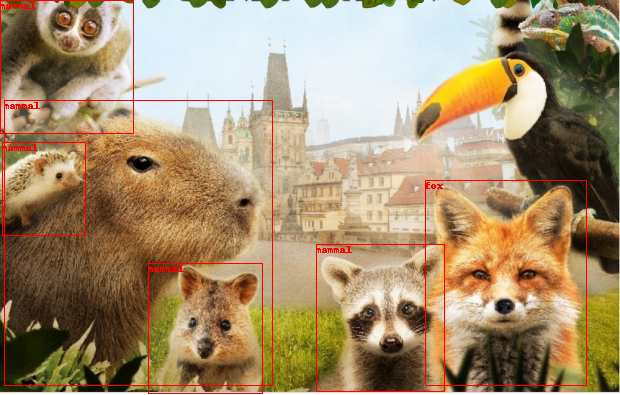

In [53]:
image